<a href="https://colab.research.google.com/github/peartt/cse480-notebooks/blob/master/05_1_NFA_and_RE_Problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Four Problems for Week 05's Assignment 

Problem 1:

    a. take a given nfa called nfa1
    
    b. convert it to dfa1 
    
    c. reverse nfa1 by hand obtaining rnfa1
    
    d. inspect and conclude (listing six paths) that rnfa1 is indeed a reverse of nfa1

Problem 2:

    a. learn about a few DFA utilities such as totalize_dfa and dotObj_dfa_w_bh
    
    b. extract an RE by inspecting nfa1 and write it down as RE1_hand
    
    c. reverse RE1_hand by inspection, writing the result down as Rev_RE1_hand
    
    d. Understand the function del_gnfa_states via its help command
    

Problem 3:

    a. obtain a GNFA for rnfa1, calling it grnfa1
    
    b. apply two elimination orders for states on grnfa1
    
    c. obtain Rev_RE1 and Rev_RE2
    
    d. check that Rev_RE1 and Rev_RE2 and Rev_RE1_hand are all isomorphic
    

Problem 4:

    a. print the NFA for Rev_RE2 and answer the stated questions.
    
    b. print the NFA for Rev_RE1_hand and answer the stated questions. 

# Imports 


In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:
  
  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty',
                   '../Jove',      '../Jove/jove']

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.DotBashers import *
from jove.Def_md2mc  import *
from jove.Def_NFA    import *
from jove.Def_DFA    import *
from jove.Def_NFA2RE import *
from jove.Def_RE2NFA import *
from jove.AnimateNFA import *
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

## Problem 1: 

In [ ]:
# Given NFA

nfa1 = md2mc('''NFA
I1 : '' -> B
I1 : a  -> I2

I2 : c  -> F3
I2 : b  -> B

B : s  -> B
B : d  -> F4
B : f  -> F3


''')


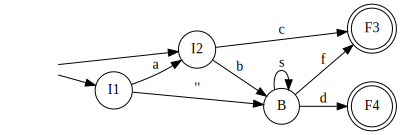

In [ ]:
dotObj_nfa(nfa1)

## 1.1: Convert the given NFA to a DFA by hand.

Use as many bullets as necessary to clearly show your work:

* I1, I2, and B are collapsed to a single state I1_I2_B.

* We then add the trivial transitions from I1_I2_B to F2 and F4 on {c,f,d}.

* I1_I2_B transitions to a new state wasI2 on 'a'.

* wasI2 transitions to F3 on 'c' and to B on {'b', 's'}.

*  B transitions to F3 on 'f', to F4 on 'd' and to B on 's'.
* We then add the transitions to the black hole state to totalize it.

In [ ]:
# DFA of nfa1

dfa1 = md2mc('''DFA

I1_I2_B : a -> wasI2
I1_I2_B: b -> B
I1_I2_B: c -> F3
I1_I2_B: f -> F3
I1_I2_B: s -> B
I1_I2_B: d -> F4
B: s -> B
B: d -> F4
B: f -> F3
B: a -> BH
B: b -> BH
B: c -> BH

wasI2: c -> F3
wasI2: b -> B
wasI2: a -> BH
wasI2: d -> BH
wasI2: f -> BH
wasI2: s -> BH

F3: a-> BH
F3: b-> BH
F3: c-> BH
F3: d-> BH
F3: f-> BH
F3: s-> BH

F4: a-> BH
F4: b-> BH
F4: c-> BH
F4: d-> BH
F4: f-> BH
F4: s-> BH

BH: a-> BH
BH: b-> BH
BH: c-> BH
BH: d-> BH
BH: f-> BH
BH: s-> BH
''')

#{a,b,c,d,f,s}

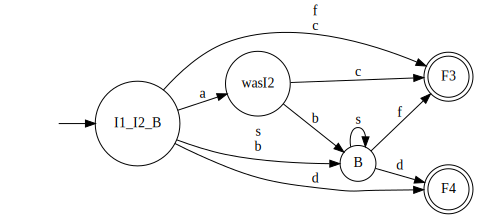

In [ ]:
dotObj_dfa(dfa1, FuseEdges=True)

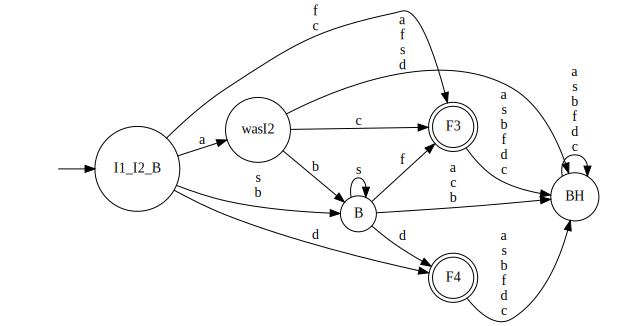

In [ ]:
dotObj_dfa_w_bh(dfa1, FuseEdges=True)

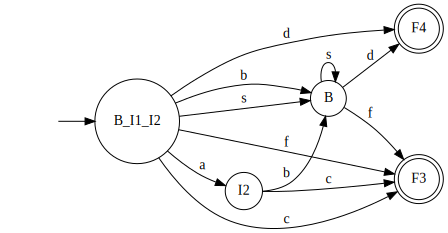

In [ ]:
dotObj_dfa(nfa2dfa(nfa1))

In [ ]:
iso_dfa(dfa1, nfa2dfa(nfa1))

True

## 1.2: Reverse nfa1 by hand and name the states in this manner:

1) Change F3 to I3

2) Change F4 to I4

3) Change I1 and I2 to F1 and F2

4) Now, reverse the transitions of nfa1, obtaining "rnfa1" below
 

In [ ]:
# There is no Jove function to reverse automatically - do it by hand!
rnfa1 = md2mc('''
NFA

B : '' -> F1
F2 : a  -> F1

I3 : c  -> F2
B : b  -> F2

B : s  -> B
I4 : d  -> B
I3 : f  -> B

''')

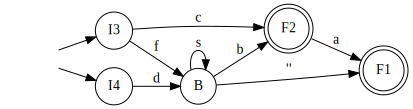

In [ ]:
dotObj_nfa(rnfa1)

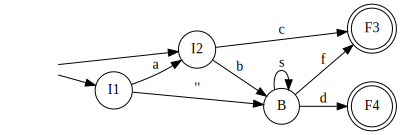

In [ ]:
dotObj_nfa(nfa1)


## 1.3: Inspect and conclude that rnfa1 is truly the reverse of nfa1
### List the first six strings in numeric order and check that they have been correctly reversed. State the string in the original machine and explain (by specifying a path as a sequence of states) that this string is present in the reversed machine also.

|Accepted String | Original Machine | Reversed Machine|
|---|---|---|
|c| I2->F3| I3->F2|
|d| I1->B->F4| I4->B->F1|
|f| I1->B->F3| I3->B->F1|
|ac| I1->I2->F3| I3->F2->F1|
|bd| I2->B->F4| I4->B->F2|
|bf| I2->B->F3| I3->B->F2|

 
 

# Problem 2: Extraction of RE by Inspection and other things before it


## 2.1: Totalize dfa1 to obtain the totalized machine, then explain totalize_dfa in a few sentences below, by looking at the Delta before and After

In [ ]:
tdfa1 = totalize_dfa(dfa1)

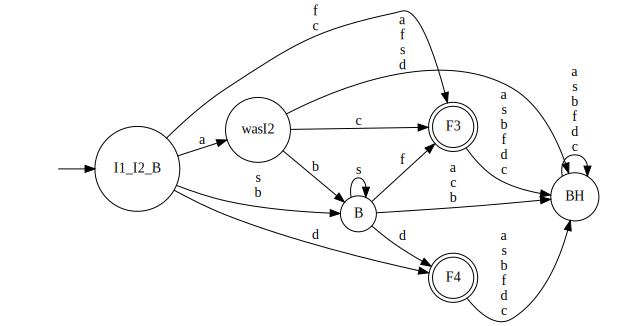

In [ ]:
dotObj_dfa_w_bh(tdfa1, FuseEdges=True)

### Your explanation of totalize_dfa:

* It totalizes the $\delta$, by pointing all missing symbols for each state in Q to a new black hole state.
* The black hole state has a transition for each symbol in $\Sigma$ to itself.


##  Compare the dfa with and without the black hole:

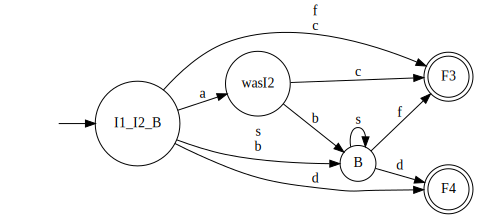

In [ ]:
dotObj_dfa(tdfa1, FuseEdges=True)

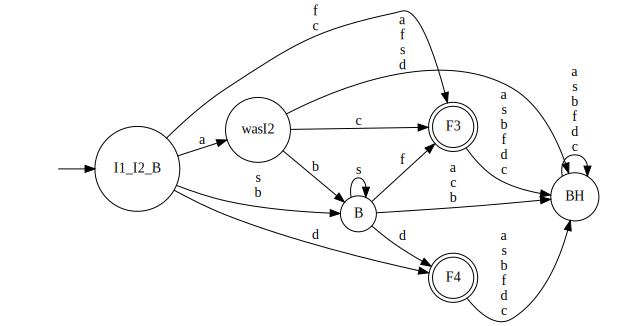

In [ ]:
dotObj_dfa_w_bh(tdfa1, FuseEdges=True)

### Was it a good idea to not always show black-holes?

* In what circumstances might you still need to apply the _w_bh view option?
An open-ended answer - anything you may think up can be a valuable piece of feedback.

Answer: It's easy to infer that any non listed states are sent to a black hole state. Showing the black hole only serves to complicate the graph.


## 2.2: Obtain an RE by looking at nfa1

* Follow all paths

* Summarize the paths in your head, using the Star operator suitably




In [ ]:
RE1_hand = "ac+c+f+d+((b+ab+'')s*(f+d))"
dotObj_dfa(min_dfa(nfa2dfa(re2nfa(RE1_hand))))

In [ ]:
iso_dfa(min_dfa(nfa2dfa(nfa1)), min_dfa(nfa2dfa(re2nfa(RE1_hand))))

Generating LALR tables


True

## 2.3: Reverse RE1 by hand to obtain Rev_RE1

Once you have an RE, you can "visually reverse it" for simple REs

In [ ]:
Rev_RE1_hand = "ca+c+f+d+((f+d)s*(b+ba+''))"

In [ ]:
iso_dfa(min_dfa(nfa2dfa(rnfa1)), min_dfa(nfa2dfa(re2nfa(Rev_RE1_hand))))

Generating LALR tables


True

## 2.4: Understand del_gnfa_states via help

In [ ]:
# help of del_gnfa_states run below
help(del_gnfa_states)

Help on function del_gnfa_states in module jove.Def_NFA2RE:

del_gnfa_states(Gin, DelList=[])
    Given a GNFA Gin with no unreachable states, 
    delete all states but f
    or Real_I and Real_F.
    If DelList is given, follow the state deletion
    order mentioned therein; else choose order internally.
    
    Return a triple (Gfinal, dotObj_List, final_re_str), where
      Gfinal       : the final GNFA
      dotObj_List  : a list of Dot objects recording the process of
                     deleting states and forming intermediate REs
      final_re_str : the final RE as a string (ready to be fed to  
                     re2nfa for converting back to an NFA)



### Document what you learned from the function help of del_gnfa_states and summarize below


* It can be done recursively or iteratively

* It can accept a deletion order list, but it is not necessary

* It outputs a tuple of 3 values, the last of which is the regular expression.

# Problem 3: Converting to GNFA and Attempting Two Elimination Orders

Work on rnfa1 to obtain Rev_RE1 and Rev_RE2 

## 3.1: Obtain grnfa1 below via a suitable command

In [ ]:
grnfa1 = mk_gnfa(rnfa1)

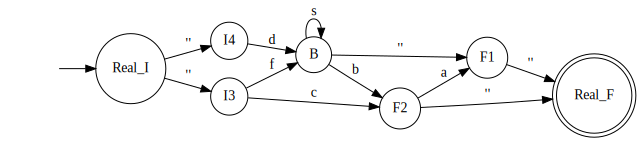

In [ ]:
dotObj_gnfa(grnfa1)

## 3.2: Apply the elimination order by supplying the second argument 
['B', 'F2', 'F1', 'I3', 'I4']

as you learned in the help

In [ ]:
(Gfinal, DO, Rev_RE1) = del_gnfa_states(grnfa1, ['B', 'F2', 'F1', 'I3', 'I4'])

**** Eliminating state B ****
**** Eliminating state F2 ****
**** Eliminating state F1 ****
**** Eliminating state I3 ****
**** Eliminating state I4 ****


In [ ]:
Rev_RE1

'((((((((d ((s)* b)) a) + (d (s)*)) + (d (s)*)) + (d ((s)* b))) + (d ((s)* b))) + ((((((((f ((s)* b)) + c) + c) a) + (f (s)*)) + (f (s)*)) + (((f ((s)* b)) + c) + c)) + (((f ((s)* b)) + c) + c))) + ((((((((f ((s)* b)) + c) + c) a) + (f (s)*)) + (f (s)*)) + (((f ((s)* b)) + c) + c)) + (((f ((s)* b)) + c) + c)))'

Generating LALR tables


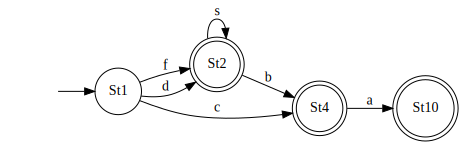

In [ ]:
dotObj_dfa(min_dfa(nfa2dfa(re2nfa(Rev_RE1))))

## 3.3: Apply the elimination order by supplying the second argument 
 ['I3', 'I4', 'F1', 'B', 'F2' ]

as you learned in the help

## Examine DO[0] through DO[Last_Legal_Item] (find out how long DO is)

DO[0] is the initial GNFA machine, DO[1] is the next one, and so on. You will see each step getting
rid of one state.

### Summarize your observation of the state elimination and which REs were introduced as a result. Use one bullet per question answered below.

In [ ]:
(Gfinal2, DO2, Rev_RE2) = del_gnfa_states(grnfa1, ['I3', 'I4', 'F1', 'B', 'F2' ])
Rev_RE2

**** Eliminating state I3 ****
**** Eliminating state I4 ****
**** Eliminating state F1 ****
**** Eliminating state B ****
**** Eliminating state F2 ****


'((((((((d + f) + f) ((s)* b)) + c) + c) ((a + "") + "")) + (((d + f) + f) (s)*)) + (((d + f) + f) (s)*))'

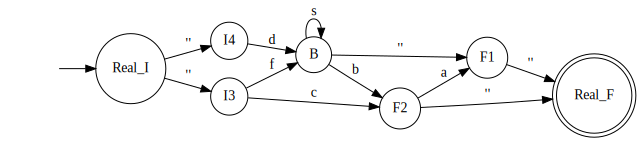

In [ ]:
DO[0]

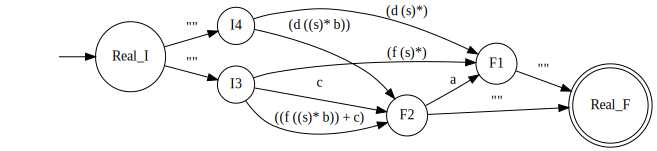

In [ ]:
DO[1]

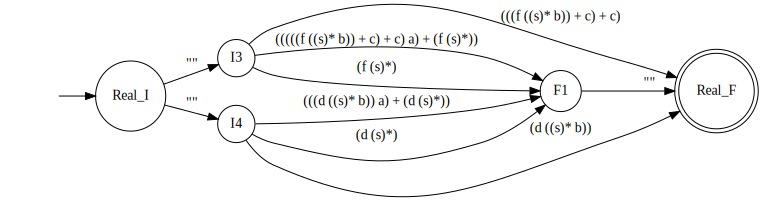

In [ ]:
DO[2]

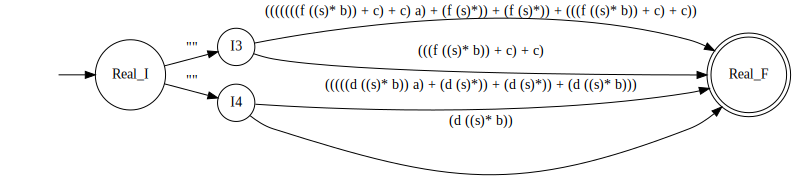

In [ ]:
DO[3]

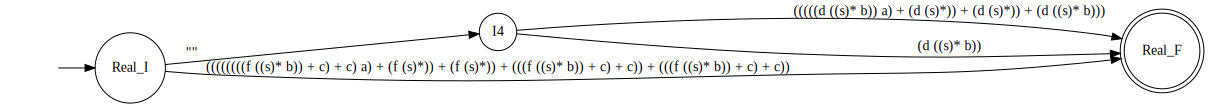

In [ ]:
DO[4]

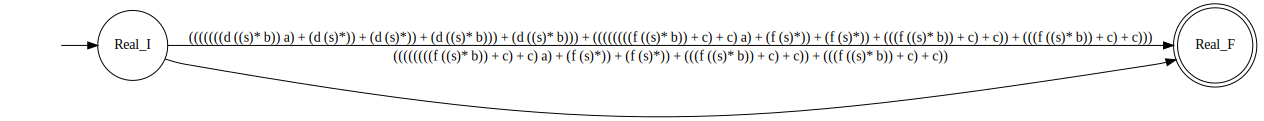

In [ ]:
DO[5]

In [ ]:
DO[6]

IndexError: ignored

|Index|States Deleted| RE Introduced|
|---|---|---|
|0|None| N/A|
|1|B|{ds\*, ds\*b, fs\*, fs\*b+c}|
|2|F2|{(((f ((s)\* b)) + c) + c), (((((f ((s)\* b)) + c) + c) a) + (f (s)\*)), (((d ((s)\* b)) a) + (d (s)\*))}|
|3|F1|{(((((((f ((s)\* b)) + c) + c) a) + (f (s)\*)) + (f (s)\*)) + (((f ((s)\* b)) + c) + c)), (((f ((s)\* b)) + c) + c),(((((d ((s)\* b)) a) + (d (s)\*)) + (d (s)\*)) + (d ((s)\* b)))} |
|4|I3|{((((((((f ((s)\* b)) + c) + c) a) + (f (s)\*)) + (f (s)\*)) + (((f ((s)\* b)) + c) + c)) + (((f ((s)\* b)) + c) + c))}|
|5|I4|{(((((((d ((s)\* b)) a) + (d (s)\*)) + (d (s)\*)) + (d ((s)\* b))) + (d ((s)\* b))) + ((((((((f ((s)\* b)) + c) + c) a) + (f (s)\*)) + (f (s)\*)) + (((f ((s)\* b)) + c) + c)) + (((f ((s)\* b)) + c) + c)))}|

## Examine DO[0] through DO[Last_Legal_Item] (find out how long DO is)

DO is 6 elements long

---



## 3.4: Check for isomorphism as requested between Rev_RE1 and Rev_RE2

Apply a Jove call that is compact (and will be given in class) that checks that Rev_RE1 and Rev_RE2 are equivalent. It has to involve iso_dfa and min_dfa and other calls.

In [ ]:
iso_dfa(min_dfa(nfa2dfa(re2nfa(Rev_RE1))), min_dfa(nfa2dfa(re2nfa(Rev_RE2))))

Generating LALR tables
Generating LALR tables


True

In [ ]:
# Just look at it again for comparison

Rev_RE1_hand

"ca+c+f+d+((f+d)s*(b+ba+''))"

## 3.5: Check for isomorphism as requested between Rev_RE1 and Rev_RE1_hand

Same methods as above.

In [ ]:
iso_dfa(min_dfa(nfa2dfa(re2nfa(Rev_RE1))), min_dfa(nfa2dfa(re2nfa(Rev_RE1_hand))))

Generating LALR tables
Generating LALR tables


True

# Problem 4: Chasing down the RE2NFA components

Find out where the s* components are and explain the set of all strings that precede s* in Rev_RE2 and the NFA of Rev_RE2

Find out where the ending "a" is, and find out the set of all the symbols that precede a

Let's first look at the NFA and then see where the RE "parts" are in it.

Generating LALR tables


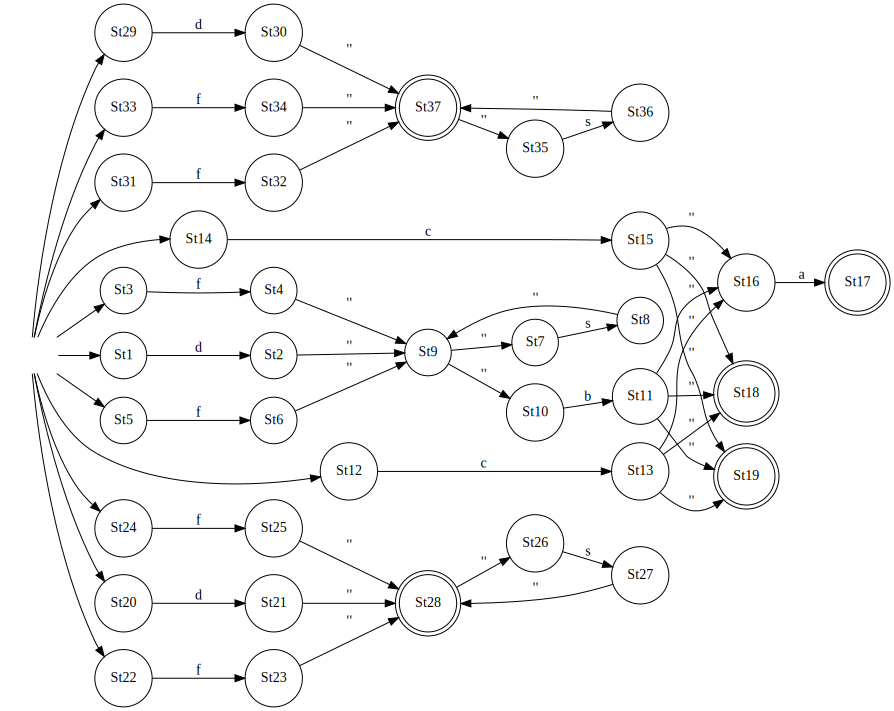

In [ ]:
dotObj_nfa(re2nfa(Rev_RE2))


This is an exercise in explaining how Rev_RE2 got translated to an NFA. You are to pick these cases and find an example of each, and explain below. What you pick does not matter.

* Find a case where a Star is used, and explain the construction, pointing to the states involved. Use up to 6 bullets below. More or less based on how you explain (clarity not length emphasized).
  - St28, St26, St27
  - Since St28 transitions to St26 on an epsilon, and St27 transitions to St28 on an epsilon, and there is only one transition, 's', between St26 and St27. Because of this St28->St26->St27 can be reduced to St28->St28 on 's'.
  - This looping on 's' represents the s* behaviour in the RE.

* Find a case where the Star follows something (I.e. a concatenation of the form "X" followed by "Star" is used). Show how that concatenation construction is accomplished in the same manner (up to 6 bullets roughly) as above. More or less based on how you explain.
  - We have already established that St28->St26->St27->St28 represents an s*.
  - This state is preceded by St23 and St22. 
  - St22 is an initial state.
  - St22 transitions to St23 on an 'f', and St23 epsilon transitions to St28
  - This chain represents the RE f(s)*.
  
* Find a case where something follows Star (I.e. a concatenation of the form "Star" followed by "X"). Explain how the concatenation is accomplished.
  - St9->St7->St8->St9 is also an construction of s*
  - It is followed by St10->St11->St18.
  - St9 transitions to St10 on an epsilon, St11 transitions to St18 on an epsilon, and St10->St11 on an 'b'.
  - This behaviour models the RE (s)*b.

## Repeat finding out the aforesaid paths in your own Rev_RE1_hand

Generating LALR tables


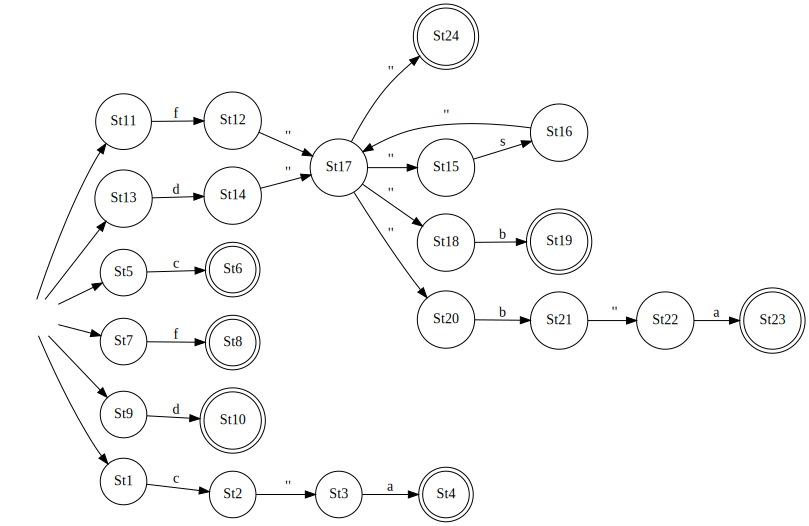

In [ ]:
dotObj_nfa(re2nfa(Rev_RE1_hand))


This is an exercise in explaining how Rev_RE1_hand got translated to an NFA. You are to pick these cases and find an example of each, and explain below. What you pick does not matter.

* Find a case where a Star is used, and explain the construction, pointing to the states involved. Use up to 6 bullets below. More or less based on how you explain (clarity not length emphasized).
  - St17->St15->St16->St17 can be reduced to St17->St17 on 's' because of the epsilon transitions.
  - This looping behaviour models the RE s*
* Find a case where the Star follows something (I.e. a concatenation of the form "X" followed by "Star" is used). If such a case does not arise in your RE, skip this part. Show how that concatenation construction is accomplished in the same manner (up to 6 bullets roughly) as above. More or less based on how you explain. 
  - St17->St18->St19
  - Because St17 transitions to St18 on an epsilon we can reduce the chain to St17->St19 on an 'b'. 
  - This chain models an RE for (s)*b.
  
* Find a case where something follows Star (I.e. a concatenation of the form "Star" followed by "X"). If such a case does not arise in your RE, skip this part. Explain how the concatenation is accomplished.
  - St17 is preceded by St11->St12.
  - Because St12 transitions to St17 on an epsilon state it can be reduced to St11->St17 on an 'f'
  - This chain represents the RE f(s)*

# END
